Peter Atsaves

All data exploration and preprocessing was placed at the bottom.

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd
Cities = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/Cities.csv')
Conferences = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/Conferences.csv')
MConferenceTourneyGames = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MConferenceTourneyGames.csv')
MGameCities = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MGameCities.csv')
MMasseyOrdinals = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MMasseyOrdinals.csv')
MNCAATourneyCompactResults = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
MNCAATourneyDetailedResults = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
MNCAASeedRoundSlots = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv')
MNCAATourneySeeds = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySeeds.csv')
MNCAATourneySlots = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MNCAATourneySlots.csv')
MRegularSeasonCompactResults = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
MRegularSeasonDetailedResults = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MRegularSeasonDetailedResults.csv')
MSampleSubmissionStage1 = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MSampleSubmissionStage1.csv')
MSeasons = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MSeasons.csv')
MSecondaryTourneyCompactResults = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MSecondaryTourneyCompactResults.csv')
MSecondaryTourneyTeams = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MSecondaryTourneyTeams.csv')
MTeamCoaches = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MTeamCoaches.csv')
MTeamConferences = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MTeamConferences.csv')
MTeams = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MTeams.csv')
MTeamSpellings = pd.read_csv('/content/drive/MyDrive/data/mens-march-mania-2022/MDataFiles_Stage1/MTeamSpellings.csv', encoding='cp1252')

Creating the dataframe and initial columns

In [13]:
df = pd.DataFrame()
df.insert(0, "T1_ID", (MNCAATourneyCompactResults['WTeamID']))
df.insert(1, "T2_ID", (MNCAATourneyCompactResults['LTeamID']))
df.insert(2, "Season", (MNCAATourneyCompactResults['Season']))
df.insert(3, "T1_Seed", 0) #seed (1-16)
df.insert(4, "T2_Seed", 0)
df.insert(5, "T1_PPG", 0) #top 25 ranked teams beaten that year
df.insert(6, "T2_PPG", 0)
df.insert(7, "T1_SeedWinPercent", 0) #all time winning percentage for that seed
df.insert(8, "T2_SeedWinPercent", 0)
df.insert(9, "T1_Rank", 0) #last day of regular season ranking
df.insert(10, "T2_Rank", 0)
df.insert(11, "T1_RSWinPercent", 0) #number of wins at tournament year prior if any
df.insert(12, "T2_RSWinPercent", 0)
df.insert(13, "T1_PointMargin", 0) #average point margin from regular season
df.insert(14, "T2_PointMargin", 0)
df.insert(15, "T1_SeedPercent", 0) #seed win percentage of all time for team 1 seed vs team 2 seed
df.insert(16, "T2_SeedPercent", 0)
df.insert(len(df.columns), "Winner", (MNCAATourneyCompactResults['WTeamID']))

Randomly choose roughly 50% of teams to switch spots (team 1 become team 2, and team 2 become team 1). Assign winner (1 or 2) to results.

In [14]:
import random
for i in range(0,len(df)):
  randomNumber = random.randint(0,1)
  if randomNumber == 1:
    df['Winner'][i] = '2'
    team1 = df['T1_ID'][i]
    team2 = df['T2_ID'][i]
    df['T1_ID'][i] = team2
    df['T2_ID'][i] = team1
  else:
    df['Winner'][i] = '1'
df.head()

,T1_ID,T2_ID,Season,T1_Seed,T2_Seed,T1_PPG,T2_PPG,T1_SeedWinPercent,T2_SeedWinPercent,T1_Rank,T2_Rank,T1_RSWinPercent,T2_RSWinPercent,T1_PointMargin,T2_PointMargin,T1_SeedPercent,T2_SeedPercent,Winner
0,1234,1116,1985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,1120,1345,1985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1250,1207,1985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,1425,1229,1985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1325,1242,1985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Linear Regression - here we are just testing to see the original accuracy with little to no data

In [15]:
df2 = df
results = pd.DataFrame(df2['Winner'])
x = df2.iloc[: , :-1]

length = len(df)
test_x = x.iloc[int(length*.8):]
test_y = results.iloc[int(length*.8):]
train_x = x.iloc[0:int(length*.8)]
train_y = results.iloc[0:int(length*.8)]

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(train_x, train_y)
lr.score(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5

Our initial model is 50%, which makes sense because guessing the team is as good as a coin flip without relevant data

Get Seed (1-16) of each team

In [16]:
for i in range(0,len(df)):
  team1id = df['T1_ID'][i]
  team2id = df['T2_ID'][i]
  season = df['Season'][i]
  for a in range(0,len(MNCAATourneySeeds)):
    if MNCAATourneySeeds['Season'][a] == season and MNCAATourneySeeds['TeamID'][a] == team1id:
      seed = MNCAATourneySeeds['Seed'][a]
      seed = seed[1:3]
      df['T1_Seed'][i] = seed
      break
  for b in range(0,len(MNCAATourneySeeds)):
    if MNCAATourneySeeds['Season'][b] == season and MNCAATourneySeeds['TeamID'][b] == team2id:
      seed = MNCAATourneySeeds['Seed'][b]
      seed = seed[1:3]
      df['T2_Seed'][i] = seed
      break

Get all time seed winning percentage (ex: winning percentage of 1 seeds vs every other seed)

In [17]:
totalSeedWins = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
totalSeedGames = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
seed_dict = MNCAATourneySeeds.to_dict()
for i in range(0,len(MNCAATourneyCompactResults)):
  team1 = MNCAATourneyCompactResults['WTeamID'][i]
  team1Season = MNCAATourneyCompactResults['Season'][i]
  team2 = MNCAATourneyCompactResults['LTeamID'][i]
  team2Season = MNCAATourneyCompactResults['Season'][i]

  for b in range(0,len(MNCAATourneySeeds)):
    if MNCAATourneySeeds['Season'][b] == team1Season and team1 == MNCAATourneySeeds['TeamID'][b]:
      seed1 = MNCAATourneySeeds['Seed'][b]
      seed1 = seed1[1:3]
      seed1 = int(seed1)
      break

  for b in range(0,len(MNCAATourneySeeds)):
    if MNCAATourneySeeds['Season'][b] == team2Season and team2 == MNCAATourneySeeds['TeamID'][b]:
      seed2 = MNCAATourneySeeds['Seed'][b]
      seed2 = seed2[1:3]
      seed2 = int(seed2)
      break
  if seed1 != seed2:
    totalSeedWins[seed1-1] +=1
    totalSeedGames[seed1-1] +=1
    totalSeedGames[seed2-1] +=1

In [18]:
totalSeedPercentages = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
import math
for i in range(0,16):
  totalSeedPercentages[i] = totalSeedWins[i]/totalSeedGames[i]
  totalSeedPercentages[i] *=100
  totalSeedPercentages[i] = int(math.ceil(totalSeedPercentages[i]))
totalSeedPercentages

[83, 72, 66, 61, 53, 52, 48, 42, 38, 39, 39, 35, 21, 15, 8, 1]

Add the seeds to the dataframe

In [19]:
for i in range(0,len(df)):
  seed1 = df['T1_Seed'][i]
  seed2 = df['T2_Seed'][i]
  win1=totalSeedPercentages[int(seed1)-1]
  win2=totalSeedPercentages[int(seed2)-1]

  df['T1_SeedWinPercent'][i] = int(win1)
  df['T2_SeedWinPercent'][i] = int(win2)
df.head()

,T1_ID,T2_ID,Season,T1_Seed,T2_Seed,T1_PPG,T2_PPG,T1_SeedWinPercent,T2_SeedWinPercent,T1_Rank,T2_Rank,T1_RSWinPercent,T2_RSWinPercent,T1_PointMargin,T2_PointMargin,T1_SeedPercent,T2_SeedPercent,Winner
0,1234,1116,1985,8,9,0,0,42,38,0,0,0,0,0,0,0,0,2
1,1120,1345,1985,11,6,0,0,39,52,0,0,0,0,0,0,0,0,1
2,1250,1207,1985,16,1,0,0,1,83,0,0,0,0,0,0,0,0,2
3,1425,1229,1985,8,9,0,0,42,38,0,0,0,0,0,0,0,0,2
4,1325,1242,1985,14,3,0,0,15,66,0,0,0,0,0,0,0,0,2


1st testing of logistic regression

In [20]:
results = pd.DataFrame(df2['Winner'])
x = df2.iloc[: , :-1]

length = len(df)
test_x = x.iloc[int(length*.8):]
test_y = results.iloc[int(length*.8):]
train_x = x.iloc[0:int(length*.8)]
train_y = results.iloc[0:int(length*.8)]

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(train_x, train_y)
lr.score(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6896551724137931

Get regular season ranking (1-300+) of each team

In [21]:
RS_ranking = []
year_team = []

for i in range(0,len(MMasseyOrdinals)):
  if MMasseyOrdinals['RankingDayNum'][i] == 133:
    RS_ranking.append(MMasseyOrdinals['OrdinalRank'][i])
    yearTeamString = str(MMasseyOrdinals['Season'][i]) + str('_') + str(MMasseyOrdinals['TeamID'][i])
    year_team.append(yearTeamString)

In [22]:
year_team.index('2003_1112')

0

Below, we had to fill in some missing values. Rankings weren't kept before the 2003 season. I decided it would be best to just take the current tournament seeding (1-16) and multiply it by 4. This becomes less accurate for worse seeds, but I found this to be the best way to make up for the lost data.

In [23]:
for i in range(0,len(df)):
  if df['Season'][i] >= 2003:
    team1YearTeam = str(df['Season'][i]) + '_' + str(df['T1_ID'][i])
    team2YearTeam = str(df['Season'][i]) + '_' + str(df['T2_ID'][i])

    team1YT = year_team.index(team1YearTeam)
    team2YT = year_team.index(team2YearTeam)

    df['T1_Rank'][i] = int(RS_ranking[team1YT])
    df['T2_Rank'][i] = int(RS_ranking[team2YT])
    
  else:
    df['T1_Rank'][i] = df['T1_Seed'][i]*4
    df['T2_Rank'][i] = df['T2_Seed'][i]*4
    #df['T1_Rank'][i] = 0
    #df['T2_Rank'][i] = 0

2nd testing of linear regression

In [24]:
df2 = df
results = pd.DataFrame(df2['Winner'])
x = df2.iloc[: , :-1]

length = len(df)
test_x = x.iloc[int(length*.8):]
test_y = results.iloc[int(length*.8):]
train_x = x.iloc[0:int(length*.8)]
train_y = results.iloc[0:int(length*.8)]

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0).fit(train_x, train_y)
lr.score(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.6982758620689655

In [25]:
df.head()

,T1_ID,T2_ID,Season,T1_Seed,T2_Seed,T1_PPG,T2_PPG,T1_SeedWinPercent,T2_SeedWinPercent,T1_Rank,T2_Rank,T1_RSWinPercent,T2_RSWinPercent,T1_PointMargin,T2_PointMargin,T1_SeedPercent,T2_SeedPercent,Winner
0,1234,1116,1985,8,9,0,0,42,38,32,36,0,0,0,0,0,0,2
1,1120,1345,1985,11,6,0,0,39,52,44,24,0,0,0,0,0,0,1
2,1250,1207,1985,16,1,0,0,1,83,64,4,0,0,0,0,0,0,2
3,1425,1229,1985,8,9,0,0,42,38,32,36,0,0,0,0,0,0,2
4,1325,1242,1985,14,3,0,0,15,66,56,12,0,0,0,0,0,0,2


Get regular season points per game for each team

In [26]:
points = []
yearTeam = []
games = []
wins = []
losses = []
for i in range(0,len(MRegularSeasonCompactResults)):
  team1Id = MRegularSeasonCompactResults['WTeamID'][i]
  season = MRegularSeasonCompactResults['Season'][i]
  team2Id = MRegularSeasonCompactResults['LTeamID'][i]

  t1 = str(season) + '_' + str(team1Id)
  t2 = str(season) + '-' + str(team2Id)

  if t1 in yearTeam:
    index = yearTeam.index(t1)
    points[index] += MRegularSeasonCompactResults['WScore'][i]
    games[index] +=1
    wins[index] +=1
  else:
    points.append(MRegularSeasonCompactResults['WScore'][i])
    yearTeam.append(t1)
    games.append(1)
    wins.append(1)
    losses.append(0)
  
  if t2 in yearTeam:
    index2 = yearTeam.index(t2)
    points[index2] += MRegularSeasonCompactResults['LScore'][i]
    games[index2] +=1
    losses[index2] +=1
  else:
    points.append(MRegularSeasonCompactResults['LScore'][i])
    yearTeam.append(t2)
    games.append(1)
    losses.append(1)
    wins.append(0)


In [27]:
for i in range(0,len(df)):
  year_team1 = str(df['Season'][i]) + '_' + str(df['T1_ID'][i])
  year_team2 = str(df['Season'][i]) + '_' + str(df['T2_ID'][i])

  index1 = yearTeam.index(year_team1)
  index2 = yearTeam.index(year_team2)

  df['T1_PPG'][i] = float(points[index1]/games[index1])
  df['T2_PPG'][i] = float(points[index2]/games[index2])

  df['T1_RSWinPercent'][i] = float(wins[index1])
  df['T2_RSWinPercent'][i] = float(wins[index2])

All time seed win percentages for each other (ex: 1 vs 7 for team1 seed=1 and team2 seed=7)

In [28]:
import numpy as np
seedWinsAllTime = np.ones((16,16))

tourney_seeds = []
tourney_year_team = []

for i in range(0,len(MNCAATourneySeeds)):
  thisSeed = MNCAATourneySeeds['Seed'][i]
  thisSeed = thisSeed[1:3]
  tourney_seeds.append(thisSeed)
  
  tourney_year_team.append(str(MNCAATourneySeeds['Season'][i]) + '_' + str(MNCAATourneySeeds['TeamID'][i]))

for i in range(0,len(MNCAATourneyCompactResults)):
  yt1 = tourney_year_team.index(str(MNCAATourneyCompactResults['Season'][i]) + '_' + str(MNCAATourneyCompactResults['WTeamID'][i]))
  seed1 = int(tourney_seeds[yt1])

  yt2 = tourney_year_team.index(str(MNCAATourneyCompactResults['Season'][i]) + '_' + str(MNCAATourneyCompactResults['LTeamID'][i]))
  seed2 = int(tourney_seeds[yt2])

  seedWinsAllTime[seed1-1][seed2-1] +=1

In [29]:
for i in range(0,len(df)):
  seed1 = int(df['T1_Seed'][i])
  seed2 = int(df['T2_Seed'][i])
  df['T1_SeedPercent'][i] = (seedWinsAllTime[seed1-1][seed2-1]/(seedWinsAllTime[seed2-1][seed1-1]+seedWinsAllTime[seed1-1][seed2-1]))*100
  df['T2_SeedPercent'][i] = (seedWinsAllTime[seed2-1][seed1-1]/(seedWinsAllTime[seed1-1][seed2-1]+seedWinsAllTime[seed2-1][seed1-1]))*100

Average Regular Season Point Margin for Each team

In [30]:
points = []
oppPoints = []
yearTeam = []
games = []
for i in range(0,len(MRegularSeasonCompactResults)):
  team1Id = MRegularSeasonCompactResults['WTeamID'][i]
  season = MRegularSeasonCompactResults['Season'][i]
  team2Id = MRegularSeasonCompactResults['LTeamID'][i]

  t1 = str(season) + '_' + str(team1Id)
  t2 = str(season) + '-' + str(team2Id)

  if t1 in yearTeam:
    index = yearTeam.index(t1)
    points[index] += MRegularSeasonCompactResults['WScore'][i]
    games[index] +=1
    oppPoints[index] += MRegularSeasonCompactResults['LScore'][i]
  else:
    points.append(MRegularSeasonCompactResults['WScore'][i])
    yearTeam.append(t1)
    games.append(1)
    oppPoints.append(MRegularSeasonCompactResults['LScore'][i])
  
  if t2 in yearTeam:
    index2 = yearTeam.index(t2)
    points[index2] += MRegularSeasonCompactResults['LScore'][i]
    games[index2] +=1
    oppPoints[index2] += MRegularSeasonCompactResults['WScore'][i]
  else:
    points.append(MRegularSeasonCompactResults['LScore'][i])
    yearTeam.append(t2)
    games.append(1)
    oppPoints.append(MRegularSeasonCompactResults['WScore'][i])

In [31]:
for i in range(0,len(points)):
  points[i] = (points[i] - oppPoints[i])/games[i]

for i in range(0,len(df)):
  yt1 = str(df['Season'][i]) + '_' + str(df['T1_ID'][i])
  index1 = yearTeam.index(yt1)
  avgPoints1 = points[index1]

  yt2 = str(df['Season'][i]) + '_' + str(df['T2_ID'][i])
  index2 = yearTeam.index(yt2)
  avgPoints2 = points[index2]

  df['T1_PointMargin'][i] = avgPoints1
  df['T2_PointMargin'][i] = avgPoints2

In [66]:
df.head()

,T1_ID,T2_ID,Season,T1_Seed,T2_Seed,T1_PPG,T2_PPG,T1_SeedWinPercent,T2_SeedWinPercent,T1_Rank,T2_Rank,T1_RSWinPercent,T2_RSWinPercent,T1_PointMargin,T2_PointMargin,T1_SeedPercent,T2_SeedPercent,Winner
0,1234,1116,1985,8,9,76,68,42,38,32,36,20,21,18,10,49,50,2
1,1120,1345,1985,11,6,72,70,39,52,44,24,18,17,11,12,37,62,1
2,1250,1207,1985,16,1,74,76,1,83,64,4,11,25,6,17,1,98,2
3,1425,1229,1985,8,9,72,74,42,38,32,36,19,20,9,11,49,50,2
4,1325,1242,1985,14,3,67,78,15,66,56,12,20,23,8,10,15,84,2


More model testing

1: Linear Regression

In [32]:
results = pd.DataFrame(df2['Winner'])
x = df2.iloc[: , :-1]

length = len(df)
test_x = x.iloc[int(length*.8):]
test_y = results.iloc[int(length*.8):]
train_x = x.iloc[0:int(length*.8)]
train_y = results.iloc[0:int(length*.8)]

lr = LogisticRegression(random_state=0).fit(train_x, train_y)
lr.score(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7219827586206896

2: Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model = model.fit(train_x, train_y)
model.score(test_x, test_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7198275862068966

3: K Means

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

results = pd.DataFrame(df2['Winner'])
df2 = df
x = df2.iloc[: , :-1]

kmeans.fit(x)
totalRightKMeans = 0
totalKMeans = 0
for i in range(0,len(kmeans.labels_)):
  if kmeans.labels_[i] == results['Winner'][i]:
    totalRightKMeans +=1
  totalKMeans +=1
print(totalRightKMeans/totalKMeans)

0.28657747086750107


4: Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

results = pd.DataFrame(df2['Winner'])
x = df2.iloc[: , :-1]

length = len(df)
test_x = x.iloc[int(length*.8):]
test_y = results.iloc[int(length*.8):]
train_x = x.iloc[0:int(length*.8)]
train_y = results.iloc[0:int(length*.8)]

pred_y = gnb.fit(train_x, train_y).predict(test_x)

naiveBayesTotal = 0
naiveBayesRight = 0

for i in range(0,len(pred_y)):
  if pred_y[i] == results['Winner'][i]:
    naiveBayesRight +=1
  naiveBayesTotal +=1

print(naiveBayesRight/naiveBayesTotal)

0.521551724137931


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'logistic regression accuracy')

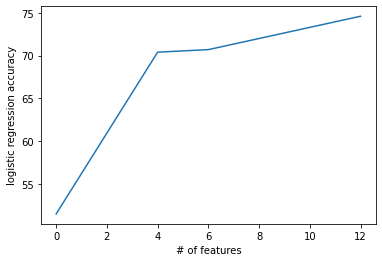

In [36]:
lrAccuracies = [51.5,70.4,70.7,74.6]
features = [0,4,6,12]
import matplotlib.pyplot as plt

plt.plot(features, lrAccuracies)
plt.xlabel("# of features")
plt.ylabel("logistic regression accuracy")

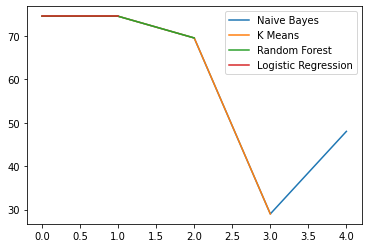

In [37]:
accuracy1 = [74.5, 74.5, 69.5, 29.0, 48.0]
accuracy2 = [74.5, 74.5, 69.5, 29.0]
accuracy3 = [74.5, 74.5, 69.5]
accuracy4 = [74.5, 74.5]
plt.plot(accuracy1)
plt.plot(accuracy2)
plt.plot(accuracy3)
plt.plot(accuracy4)
plt.legend(["Naive Bayes", "K Means", "Random Forest", "Logistic Regression"], loc ="upper right")

DATA PREPROCESSING BELOW

Teams that have visited the tournament most - experience, strong programs

In [38]:
mostVisits = []
mostVisitsTeams = []
for i in range(0,len(MNCAATourneySeeds)):
  if MNCAATourneySeeds['TeamID'][i] in mostVisitsTeams:
    index = mostVisitsTeams.index(MNCAATourneySeeds['TeamID'][i])
    mostVisits[index] += 1
  else:
    mostVisitsTeams.append(MNCAATourneySeeds['TeamID'][i])
    mostVisits.append(1)

mostVisitsDF = pd.DataFrame(mostVisits, mostVisitsTeams)

mostVisitsNames = mostVisitsTeams
teamList = list(MTeams['TeamID'])
for x in range(0,len(mostVisits)):
  if (mostVisitsTeams[x] in teamList):
    mostVisitsNames[x] = MTeams['TeamName'][teamList.index(mostVisitsTeams[x])]
mostVisitsDF2 = pd.DataFrame(mostVisits, mostVisitsNames)
mostVisitsDF2.nlargest(10, 0)

,0
Kansas,35
Duke,34
North Carolina,33
Arizona,32
Kentucky,30
Michigan St,30
Syracuse,29
Oklahoma,27
Purdue,27
UCLA,27


Total wins of each seed in history including play-in games (11 and 16 seeds are higher because of this)

In [39]:
#length is 2317
seeds = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
seedWins = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,2317):
  currentTeam = MNCAATourneyCompactResults['WTeamID'][i]
  found = False
  seedIndex = 0
  #length is 2354
  while found == False:
    if MNCAATourneySeeds['Season'][seedIndex] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][seedIndex] == MNCAATourneyCompactResults['WTeamID'][i]:
      thisSeed = MNCAATourneySeeds['Seed'][seedIndex]
      thisSeed = int(thisSeed[1:3])
      seedWins[thisSeed-1] += 1
      found = True
    else:
      seedIndex+=1
seedWins

[484, 339, 266, 218, 161, 154, 129, 102, 85, 89, 107, 78, 38, 25, 11, 31]

How certain seeds do against each other

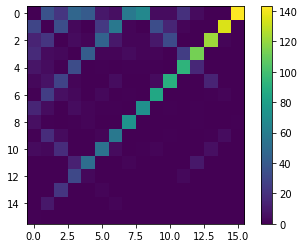

In [40]:
#length is 2317
import numpy as np
matchupMatrix = np.zeros((16,16))
for i in range(0,2317):
  winningTeam = MNCAATourneyCompactResults['WTeamID'][i]
  losingTeam = MNCAATourneyCompactResults['LTeamID'][i]
  foundWin = False
  foundLoss = False
  seedIndex1 = 0
  seedIndex2 = 0
  #length is 2354

  while foundWin == False:
    if MNCAATourneySeeds['Season'][seedIndex1] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][seedIndex1] == winningTeam:
      foundWin = True
      winSeed = MNCAATourneySeeds['Seed'][seedIndex1]
      winSeed = int(winSeed[1:3])
      while foundLoss == False:
        if MNCAATourneySeeds['Season'][seedIndex2] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][seedIndex2] == losingTeam:
          foundLoss = True
          lossSeed = MNCAATourneySeeds['Seed'][seedIndex2]
          lossSeed = int(lossSeed[1:3])
          if lossSeed != winSeed:
            matchupMatrix[winSeed-1][lossSeed-1] +=1

          seedIndex1 = 0
          seedIndex2 = 0
        else:
          seedIndex2+=1
    else:
      seedIndex1+=1
import matplotlib.pyplot as plt
plt.imshow(matchupMatrix)
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


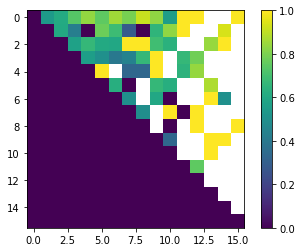

In [41]:
matchupMatrix2 = np.zeros((16,16))
for i in range(0,16):
  for j in range(i+1,16):
    matchupMatrix2[i][j] = matchupMatrix[i][j]/(matchupMatrix[i][j]+matchupMatrix[j][i])

plt.imshow(matchupMatrix2)
plt.colorbar()
plt.show()

Average winning scores in tournament

In [42]:
averageWinning = 0
averageLosing = 0

for i in range(0,2317):
  averageWinning += MNCAATourneyCompactResults['WScore'][i]
  averageLosing += MNCAATourneyCompactResults['LScore'][i]

averageWinning /=2317
averageLosing /=2317
print("Average Winning Score in Tournament: ", averageWinning)
print("Average Losing Score in Tournament: ", averageLosing)

Average Winning Score in Tournament:  76.89123867069486
Average Losing Score in Tournament:  65.168321104877


Regular season scores

In [43]:
averageWinningRS = 0
averageLosingRS = 0

for i in range(0,174471):
  averageWinningRS += MRegularSeasonCompactResults['WScore'][i]
  averageLosingRS += MRegularSeasonCompactResults['LScore'][i]

averageWinningRS /=174471
averageLosingRS /=174471
print("Average Winning Score in Regular season: ", averageWinningRS)
print("Average Losing Score in Regular season: ", averageLosingRS)

Average Winning Score in Regular season:  76.76297493566265
Average Losing Score in Regular season:  64.66357732803732


Championship wins for each seed

In [44]:
championshipWins = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
championshipLosses = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0,2317):
  if MNCAATourneyCompactResults['DayNum'][i] == 154:
    finalWinner = MNCAATourneyCompactResults['WTeamID'][i]
    index = 0
    found = False
    while found == False:
      if MNCAATourneySeeds['Season'][index] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][index] == finalWinner:
        seed = MNCAATourneySeeds['Seed'][index]
        seed = int(seed[1:3])
        championshipWins[seed-1] +=1
        found = True
      else:
        index +=1
    finalLoser = MNCAATourneyCompactResults['LTeamID'][i]
    index = 0
    found = False
    while found == False:
      if MNCAATourneySeeds['Season'][index] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][index] == finalLoser:
        seed = MNCAATourneySeeds['Seed'][index]
        seed = int(seed[1:3])
        championshipLosses[seed-1] +=1
        found = True
      else:
        index +=1

In [45]:
championshipWins

[23, 5, 4, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
championshipLosses

[13, 8, 7, 2, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]

No 9 seed or worse has ever made it to the championship, so we know that if they make it to the final four, it is more than likely that they will lose. We also notice that when a 1 seed gets to the championship, they have won 23 out of 36 times, which is the best percentage and total out of all except for one 7 seed that is 1-0. If a 1 seed makes it to the final, then there are good odds they will win.

Elite Eight Appearances

In [47]:
eewins = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
eelosses = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(0,2317):
  if MNCAATourneyCompactResults['DayNum'][i] == 145 or MNCAATourneyCompactResults['DayNum'][i] == 143:
    finalWinner = MNCAATourneyCompactResults['WTeamID'][i]
    index = 0
    found = False
    while found == False:
      if MNCAATourneySeeds['Season'][index] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][index] == finalWinner:
        seed = MNCAATourneySeeds['Seed'][index]
        seed = int(seed[1:3])
        eewins[seed-1] +=1
        found = True
      else:
        index +=1
    finalLoser = MNCAATourneyCompactResults['LTeamID'][i]
    index = 0
    found = False
    while found == False:
      if MNCAATourneySeeds['Season'][index] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][index] == finalLoser:
        seed = MNCAATourneySeeds['Seed'][index]
        seed = int(seed[1:3])
        eelosses[seed-1] +=1
        found = True
      else:
        index +=1

In [48]:
eewins

[76, 56, 35, 13, 6, 5, 2, 6, 4, 3, 6, 2, 0, 0, 0, 0]

In [49]:
eelosses

[37, 34, 28, 31, 22, 21, 9, 5, 2, 7, 7, 7, 3, 0, 1, 0]

We notice that a 13 seed or worse has never made the final four, they have lost in the elite eight every time. Outside of seeds 1,2,3 every seed has a bad probability of making it to the final four.

Team Rankings using BIH system

In [50]:
#length is 4521720
dayNum133MMasseyOrdinalsAP = pd.DataFrame(columns = ['Season', 'RankingDayNum', 'SystemName', 'TeamID', 'OrdinalRank'])
for i in range(0,4521720):
  if MMasseyOrdinals['RankingDayNum'][i] == 133 and MMasseyOrdinals['SystemName'][i] == "AP":
    dayNum133MMasseyOrdinalsAP.loc[len(dayNum133MMasseyOrdinalsAP.index)] = [MMasseyOrdinals['Season'][i],MMasseyOrdinals['RankingDayNum'][i],MMasseyOrdinals['SystemName'][i],MMasseyOrdinals['TeamID'][i],MMasseyOrdinals['OrdinalRank'][i]]

In [51]:
dayNum133MMasseyOrdinalsAP.shape

(451, 5)

In [52]:
#length is 4521720
dayNum133MMasseyOrdinalsBIH = pd.DataFrame(columns = ['Season', 'RankingDayNum', 'SystemName', 'TeamID', 'OrdinalRank'])
for i in range(0,4521720):
  if MMasseyOrdinals['RankingDayNum'][i] == 133 and MMasseyOrdinals['SystemName'][i] == "BIH":
    dayNum133MMasseyOrdinalsBIH.loc[len(dayNum133MMasseyOrdinalsBIH.index)] = [MMasseyOrdinals['Season'][i],MMasseyOrdinals['RankingDayNum'][i],MMasseyOrdinals['SystemName'][i],MMasseyOrdinals['TeamID'][i],MMasseyOrdinals['OrdinalRank'][i]]

In [53]:
dayNum133MMasseyOrdinalsBIH.shape

(5833, 5)

Here we used BIH because the seeds are outside of just the top 25 which is how it is for the AP rankings. This gives us a more accurate view of all the teams in the tournament. The lowest(worst) ranking we have is 353

In [54]:
dayNum133MMasseyOrdinalsBIH['OrdinalRank'].max()

353

In [55]:
dayNum133MMasseyOrdinalsBIH['OrdinalRank'].mean()

172.17229555974626

In [56]:
winsByRanking = []
for i in range(0,36):
  winsByRanking.append(0)

In [57]:
for i in range(0,1181):
  tourneyGameWin = MNCAATourneyDetailedResults['WTeamID'][i]
  found = False
  index = 0
  while found == False:
    if dayNum133MMasseyOrdinalsBIH['TeamID'][index] == tourneyGameWin and dayNum133MMasseyOrdinalsBIH['Season'][index] == MNCAATourneyDetailedResults['Season'][i]:
      found = True
    else:
      index +=1
      if index >=5833:
        found = True
  if index < 5833:
    winsByRanking[int(dayNum133MMasseyOrdinalsBIH['OrdinalRank'][index]/10)] +=1

Wins by ranking (Bin size of 10)

In [58]:
print(winsByRanking)

[411, 255, 148, 101, 93, 40, 19, 3, 4, 6, 2, 2, 1, 2, 3, 1, 4, 3, 3, 7, 1, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0]


We can see that no seed ranked above 280 has ever won a tournament game, and only 9 teams ranked above 200 have ever won a tournament game. If a team above 200 is in the tournament, it is very unlikely they will win a game. From teams 70-199, only 41 of them have won a tournament game. The rankings we are using are from the system "BIH" and are from day number 133 which is the last day that rankings are made.

Reasons why 15 seeds might upset a 2 seed

In [59]:
tourneySize = len(MNCAATourneyCompactResults['Season'])

wins2Names = []
losses2Names = []
wins15Names = []
losses15Names = []
wins2Year = []
losses2Year = []
wins15Year = []
losses15Year = []

for i in range(0, tourneySize):
  winner = MNCAATourneyCompactResults['WTeamID'][i]
  loser = MNCAATourneyCompactResults['LTeamID'][i]
  foundWin = False
  seedIndex = 0
  winseed = 0
  lossseed = 0
  while foundWin == False: 
    if MNCAATourneySeeds['Season'][seedIndex] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][seedIndex] == MNCAATourneyCompactResults['WTeamID'][i]:
        winseed = MNCAATourneySeeds['Seed'][seedIndex]
        winseed = int(winseed[1:3])
        foundWin = True
    else:
      seedIndex +=1
  
  foundLoss = False
  seedIndex2 = 0
  while foundLoss == False: 
    if MNCAATourneySeeds['Season'][seedIndex2] == MNCAATourneyCompactResults['Season'][i] and MNCAATourneySeeds['TeamID'][seedIndex2] == MNCAATourneyCompactResults['LTeamID'][i]:
        lossseed = MNCAATourneySeeds['Seed'][seedIndex2]
        lossseed = int(lossseed[1:3])
        foundLoss = True
    else:
      seedIndex2 +=1
  if lossseed == 15 and winseed == 2:
    wins2Names.append(MNCAATourneySeeds['TeamID'][seedIndex])
    wins2Year.append(MNCAATourneySeeds['Season'][seedIndex])
    losses15Names.append(MNCAATourneySeeds['TeamID'][seedIndex2])
    losses15Year.append(MNCAATourneySeeds['Season'][seedIndex2])
  if lossseed == 2 and winseed == 15:
    wins15Names.append(MNCAATourneySeeds['TeamID'][seedIndex])
    wins15Year.append(MNCAATourneySeeds['Season'][seedIndex])
    losses2Names.append(MNCAATourneySeeds['TeamID'][seedIndex2])
    losses2Year.append(MNCAATourneySeeds['Season'][seedIndex2])

In [60]:
wins15Names

[1350, 1365, 1164, 1214, 1250, 1313, 1195, 1292, 1331]

In [61]:
wins15Wins = [0,0,0,0,0,0,0,0,0]
wins15Losses = [0,0,0,0,0,0,0,0,0]

for i in range(0,len(wins15Names)):
  for x in range(0,len(MRegularSeasonCompactResults['Season'])):
    if MRegularSeasonCompactResults['WTeamID'][x] == wins15Names[i] and MRegularSeasonCompactResults['Season'][x] == wins15Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      wins15Wins[i] +=1
    if MRegularSeasonCompactResults['LTeamID'][x] == wins15Names[i] and MRegularSeasonCompactResults['Season'][x] == wins15Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      wins15Losses[i] +=1

In [62]:
losses15Wins = []
losses15Losses = []
for i in range(0,len(losses15Names)):
  losses15Wins.append(0)
  losses15Losses.append(0)

for i in range(0,len(losses15Names)):
  for x in range(0,len(MRegularSeasonCompactResults['Season'])):
    if MRegularSeasonCompactResults['WTeamID'][x] == losses15Names[i] and MRegularSeasonCompactResults['Season'][x] == losses15Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      losses15Wins[i] +=1
    if MRegularSeasonCompactResults['LTeamID'][x] == losses15Names[i] and MRegularSeasonCompactResults['Season'][x] == losses15Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      losses15Losses[i] +=1

In [63]:
print(sum(wins15Wins)/(sum(wins15Losses)+sum(wins15Wins)))
print(sum(losses15Wins)/(sum(losses15Losses)+sum(losses15Wins)))

0.8529411764705882
0.8273170731707317


The 15 seeds that beat a 2 seed win 85.3% of their games in the last month of the regular season. The 15 seeds that lose win 82.7% of their games in the last month of the regular season. This differrence was to see if a team that is currently hot and winning, but the change in % is so minimal it doesn't appear to have an effect.

In [64]:
wins2Wins = []
wins2Losses = []
for i in range(0,len(wins2Names)):
  wins2Wins.append(0)
  wins2Losses.append(0)

for i in range(0,len(wins2Names)):
  for x in range(0,len(MRegularSeasonCompactResults['Season'])):
    if MRegularSeasonCompactResults['WTeamID'][x] == wins2Names[i] and MRegularSeasonCompactResults['Season'][x] == wins2Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      wins2Wins[i] +=1
    if MRegularSeasonCompactResults['LTeamID'][x] == wins2Names[i] and MRegularSeasonCompactResults['Season'][x] == wins2Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      wins2Losses[i] +=1

losses2Wins = []
losses2Losses = []
for i in range(0,len(losses2Names)):
  losses2Wins.append(0)
  losses2Losses.append(0)

for i in range(0,len(losses2Names)):
  for x in range(0,len(MRegularSeasonCompactResults['Season'])):
    if MRegularSeasonCompactResults['WTeamID'][x] == losses2Names[i] and MRegularSeasonCompactResults['Season'][x] == losses2Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      losses2Wins[i] +=1
    if MRegularSeasonCompactResults['LTeamID'][x] == losses2Names[i] and MRegularSeasonCompactResults['Season'][x] == losses2Year[i] and MRegularSeasonCompactResults['DayNum'][x] > 103:
      losses2Losses[i] +=1

In [65]:
print(sum(wins2Wins)/(sum(wins2Losses)+sum(wins2Wins)))
print(sum(losses2Wins)/(sum(losses2Losses)+sum(losses2Wins)))

0.7749140893470791
0.76


We also find no significance when looking at the 2 seeds.

In terms of missing values, there weren't any in the datasets because each game has information about it. The only thing that would be missing would be certain categories from 1985 to 2002. There are files of compact and detailed results for data about the regular season and ncaa tournament. From 1985 to 2002, for each game there are only 8 columns of data, whereas after 2002 there are 34 columns of data. Instead of trying to fill in this data by adding means of averages for these values, I decided not to touch the data. This is because the data is already functional and there are no missing values, just less columns. It just means that whenever I wanted to look at the detailed results, I only looked at the data from 2003 to present.
We learned a lot of things from looking at the data. One of them is the overall seeding of teams. This is different from the typical 1-16. Teams could be ranked from 1-353rd best in the nation, and using this data we were able to see how a number of teams who were above a certain ranking never won a single tournament game in the history of the tournament. 
One correlation I was hoping to see was if teams that won more games later in the regular season performed better in the tournament. Unfortunately, this prediction was false, and there was only a slight difference. More specifically, I looked at 2 and 15 seeds and the difference between the 2 seeds that won and lost this matchup was minimal, and the same went for 15 seeds.
I also looked at how certain seeds play against each other. We were able to notice a lot of things from this. Whenever a 12 and 13 seed matchup, the 12 seed wins that matchup a majority of the time, despite there only being one ranking difference between them. Another surprising one was that 1 seeds don't perform very well against 11 seeds. 
As far as how far teams make it in the tournament, there are always a couple low ranked teams that make it far, but the vast majority are 1,2, and 3 seeds. We also noticed that no 13 seed or higher made it to the final four. So if we ever predict a 13 seed to win in the first two rounds, we would expect them to lose in the elite eight.
When looking at regular season stats vs tournament stats, we found that the average winning and losing scores were extremely similar. I was hoping to find a difference to see if for example teams that played better defense won more games, but I didn't find this to be the case.
I also looked at the teams that have been to the tournament the most. North Carolina, Duke, and Kansas among the leaders. If we are ever in doubt of a pick, we may choose one of these schools to advance based on the fact that going to the tournament the most could mean these programs have more experience and better coaching than their opponents, even if they have a low seed in the tournament.
The NCAA tournament comes down to luck a lot of the time, but maybe that luck is because of factors we haven't considered. I hope to come up with a solution to this problem in phase ii to determine the winners of each game for the next tournament.
We can see that no seed ranked above 280 has ever won a tournament game, and only 9 teams ranked above 200 have ever won a tournament game. If a team above 200 is in the tournament, it is very unlikely they will win a game. From teams 70-199, only 41 of them have won a tournament game. The rankings we are using are from the system "BIH" and are from day number 133 which is the last day that rankings are made.
